Simple Linear Regression

Here, we are implementing simple linear regression from scratch. 
You will use the pandas library to load the csv file into a dataframe: 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read the csv file and load into a pandas dataframe 
# make sure Boston.csv is in the same file path as this notebook
boston = pd.read_csv('Boston.csv')

In [3]:
# read the above link to learn more about what each of the columns indicate 
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Simple linear regression builds a linear relationship between an input variable $X$ and an output variable $Y$. We can define this linear relationship as follows: 

$$Y = \beta_0 + \beta_1X$$

#### Objective: find the linear relationship between the proportion of non-retail business acres per town (indus) and the full-value property-tax rate per 10,000 dollars (tax)

So our equation will look like:

$$TAX = \beta_0 + \beta_1INDUS$$

Here, the coefficient $\beta_0$ is the intercept, and $\beta_1$ is the scale factor or slope. How do we determine the values of these coefficients? 

There are several different methods to do so, but we will focus on the Ordinary Least Squares (OLS) method. This method minimizes the sum of the squares of the differences between the observed dependent variable and those predicted by the linear function. 

Recall that a residual is the difference between any data point and the line of regression. When we develop a regression model, we want the sum of the residuals squared to be minimized, indicating that the model is a close fit to the data. 

$$RSS = \sum_{i =1}^{n} (y_i - f(x_i))^2$$
$$= \sum_{i =1}^{n} (y_i - (\beta_0 + \beta_1x_i))^2$$

This is the objective function we minimize to find $\beta_0$ and $\beta_1$. 

In [4]:
# set X to 'indus' and y to 'tax'
X = boston['indus']
y = boston['tax']

First, visualize the data by plotting X and y using matplotlib. Be sure to include a title and axis labels. 

Text(0.5,1,'Boston Tax Vs. Indus')

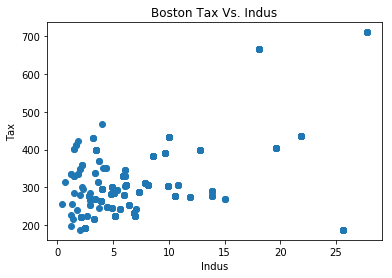

In [5]:
# TODO: display plot 
plt.plot(X, y, 'o')
# TODO: labels and title
plt.ylabel('Tax')
plt.xlabel('Indus')
plt.title('Boston Tax Vs. Indus')

TODO: What do you notice about the relationship between the variables? 

A: There seems to be a positive linear relationship but the clumping at the base will most likely lower our r^2 and RSS

Next, find the coefficients. The values for $\beta_0$ and $\beta_1$ are given by the following equations, where $n$ is the total number of values. This derivation was done in class. 


$$\beta_1 = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$


$$\beta_0 = \bar{y} - \beta_1\bar{x}$$

In [23]:
def get_coeffs(X, y):
    X_mu = X.mean()
    y_mu = y.mean()
    b1 = np.sum((y-y_mu)*(X-X_mu))/np.sum((X-X_mu)**2)
    b0 = y_mu - b1*X_mu
    return(b0,b1)

In [24]:
b0, b1 = get_coeffs(X, y)
print("Regression line: TAX = " + str(round(b0)) + " + " + str(round(b1)) +"*INDUS")

Regression line: TAX = 211.0 + 18.0*INDUS


Plot the regression line overlayed on the real y-values. 

Text(0.5,1,'Boston Tax Vs. Indus')

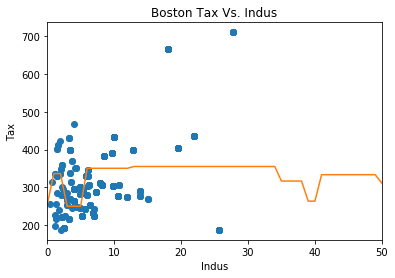

In [25]:
# TODO: plot y-values 
reg_line = b0 + b1*X
plt.plot(X, y, 'o')
plt.plot(reg_line)
plt.xlim(0, 50)
plt.ylabel('Tax')
plt.xlabel('Indus')
plt.title('Boston Tax Vs. Indus')

The line appears to fit the data, but first, let us find the RSS to evaluate this model. The RSS is used to measure the amount of variance in the data set that is not explained by the regression model. Recall that
$$RSS = \sum_{i =1}^{n} (y_i - (\beta_0 + \beta_1x_i))^2$$

In [26]:
# TODO: implement function
def get_RSS(b0, b1, X, y):
    '''
    Params: 
        b0: beta 0
        b1: beta 1
        X: X vector
        y: y vector
    Returns:
        residual sum of squares (RSS) 
    '''
    RSS = np.sum((y - (b0 + b1*X))**2)
    return RSS

In [27]:
# run this cell to print RSS
print("RSS:", get_RSS(b0, b1, X, y))

RSS: 6892554.224031562


We can also evaluate the model through the Root Mean Squared Error (RMSE) and the Coefficient of Determination ($R^2$ score). 
- The RMSE is similar to the RSS, but provides a value with more interpretable units -- in our case, tax rate per 10,000 dollars.  
- The $R^2$ value represents the proportion of the variance for the dependent variable that is explained by the independent variable. 

Use the following equations to find the RMSE and $R^2$ score:

$$ RMSE = \sqrt(\sum_{i=1}^{n} \frac{1}{n} (\hat{y_i} - y_i)^2 )$$

$$ R^2 = 1 - \frac{SS_r}{SS_t} $$ where

$$SS_t = \sum_{i = 1}^{n} (y_i - \bar{y})^2$$

and

$$SS_r = \sum_{i=1}^{n} (y_i - \hat{y_i})^2$$



In [44]:
# TODO: implement function
def get_RMSE(b0, b1, X, y):
    '''
    Params: 
        b0: beta 0
        b1: beta 1
        X: X vectore
        y: y vector
    Returns:
        rmse 
    '''
    rmse = (np.sum(y - b0 + b1 * X))**1/2
    return(rmse)

In [45]:
# run cell to print RMSE
print("RMSE: ", get_RMSE(b0, b1, X, y))

RMSE:  99781.49095633131


In [30]:
# TODO: implement function
def get_R2(b0, b1, X, y):
    '''
    Params: 
        b0: beta 0
        b1: beta 1
        X: X vector
        y: y vector
    Returns:
        r2 score
    '''
    RSS = get_RSS(b0, b1, X, y)
    TSS = np.sum((y - y.mean())**2)
    r2 = 1 - (RSS/TSS)
    return(r2)

In [31]:
# run cell to print RMSE
print("R2: ", get_R2(b0, b1, X, y))

R2:  0.519495237003779


TODO: Analyze what the above $R^2$ score indicates about the model. 

A: Our R^2 above is approximately 0.52. And as we know, R^2 is the percentage of the inputs variation that our trained model explains. Because our R^2 score is only 0.52 while there is probably some positive relationship, this model might need more inputs and interaction terms in order to more accurately predict the output, lowering our R^2 term.

Now, we will compare the above results with the results from using scikit-learn, a machine learning library in Python. Read the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to learn how to use this library. Return the $R^2$ score and RMSE. 

In [32]:
# TODO: scikit learn function
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def linear_regression_SKL(X, y):
    '''
    Params:
        X: X vector
        y: y vector
    Returns:
        rmse and r2 as a tuple
    '''    
    x = np.array(X).reshape((-1, 1))
    reg = LinearRegression().fit(x,y)
    y_pred = reg.predict(x)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r2 = reg.score(x, y)
    return(rmse, r2)

In [33]:
# run this cell to print results from SKL LR
linear_regression_SKL(X, y)

(116.71181887064391, 0.5194952370037791)

TODO: Analyze the results and compare the RMSE and $R^2$ to the previous method.

A: As you can see, while our r2 term stay almost exactly the same as our predicted one above, our RMSE has dropped significantly. Because the RMSD is used to aggregate the magnitudes of the errors in our predictions, this shows us that SKL linear regression is much better at minimizing the magnitude of error in our model. 